In [89]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import time

import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
import seaborn as sns
# sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

# My packages
from source import parse_mxml as pm
from source import log_representation as lr
from source import plots as plts
from source import drift_detection as dd
from source import drift_localization as dl
from source import offline_streaming_clustering as off_sc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import hdbscan

from sklearn.base import clone as sk_clone 

import random
random.seed(42)

import os
import glob

import gc
gc.enable()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def insensitive_glob(pattern):
    def either(c):
        return '[%s%s]' % (c.lower(), c.upper()) if c.isalpha() else c
    return glob.glob(''.join(map(either, pattern)))

def if_any(string, lista):
    for l in lista:
        if l in string:
            return True
    return False

In [3]:
logs = insensitive_glob("../../../../../../../Datasets/Business_Process_Drift_Logs/Logs/*/*k.MXML")

In [4]:
logs = [x for x in logs if "2.5" not in x]

In [5]:
logs

['../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cb\\cb10k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cb\\cb5k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cb\\cb7.5k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cd\\cd10k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cd\\cd5k.MXML',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cd\\cd7.5k.MXML',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cf\\cf10k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cf\\cf5k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cf\\cf7.5k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cm\\cm10k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cm\\cm5k.mxml',
 '../../../../../../..\\Datasets\\Business_Process_Drif

### Read and Prep log file

In [6]:
# logs[39]
# logs[39]
# logs[24]
# logs[15]

'../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\fr\\fr10k.MXML'

In [118]:
log = logs[15]
print(log)
log_read = pm.all_prep(log)
tokens = lr.get_traces_as_tokens(log_read)
y_true = list(range(int(len(tokens)/10), len(tokens), int(len(tokens)/10)))
print(len(tokens))
print(len(tokens.unique()))

../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\fr\fr10k.MXML
10000
49


### Trace Clustering

In [8]:

# "activity_binary": lr.get_binary_representation,
# "activity_frequency": lr.get_frequency_representation,

# "transitions_binary": lr.get_binary_transitions_representation,
# "transitions_frequency": lr.get_frequency_transitions_representation,

# "activity_tfidf": lr.get_tfidf_representation,
# "transitions_tfidf": lr.get_tfidf_transitions_representation,

# "activity_transitions_frequency": lr.get_activity_transitions_frequency_representation,
# "activity_transitions_binary": lr.get_activity_transitions_binary_representation

In [119]:
clustering_window_size=150
representation = lr.get_binary_representation
distance_list=['euclidean', 'hamming','cityblock', 'jaccard', 'cosine']

In [120]:
# model = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
# model = DBSCAN(eps=2, min_samples=3, metric='euclidean')
# model = DBSCAN(eps=2.5, min_samples=3, metric='euclidean')
model = DBSCAN(eps=5, min_samples=3, metric='manhattan')
# model = DBSCAN(eps=0.05, min_samples=3, metric='hamming')
# model = DBSCAN(eps=0.05, min_samples=3, metric='cosine')

In [121]:
# model=KMeans(n_clusters=2, random_state=42)

In [122]:
# model= hdbscan.HDBSCAN(metric='euclidean') #, cluster_selection_method ='leaf', min_cluster_size=5, allow_single_cluster=True
# model= hdbscan.HDBSCAN(metric='mahalanobis')
# model= hdbscan.HDBSCAN(metric='manhattan')
# model= hdbscan.HDBSCAN(metric='euclidean'
#                        ,gen_min_span_tree=True
# #                         , allow_single_cluster=True
# #                        , cluster_selection_method='leaf'
# #                         , min_cluster_size=int(clustering_window_size*0.1)
# #                         , min_samples=int(clustering_window_size*0.05)
# #                        , cluster_selection_epsilon=0.5
# #                        
#                       )

# model = hdbscan.HDBSCAN(metric="cosine",algorithm="generic")


In [123]:
# X=representation(tokens).drop_duplicates()
# test=model.fit_predict(X.values)
# test

In [124]:
run_df, X = off_sc.run_offline_clustering_window(
    tokens,
    representation,
    model,
    distance_list,
    clustering_window_size,
#     activity_binary,
    sliding_window=False,
    sliding_step=1
)

In [125]:
run_df

k  \
i          
150    2   
300    2   
450    2   
600    2   
750    2   
900    2   
1050   2   
1200   2   
1350   2   
1500   2   
1650   2   
1800   2   
1950   2   
2100   2   
2250   2   
2400   2   
2550   2   
2700   2   
2850   2   
3000   2   
3150   2   
3300   2   
3450   2   
3600   2   
3750   2   
3900   2   
4050   2   
4200   2   
4350   2   
4500   2   
4650   2   
4800   2   
4950   2   
5100   2   
5250   2   
5400   2   
5550   2   
5700   2   
5850   2   
6000   2   
6150   2   
6300   2   
6450   2   
6600   2   
6750   2   
6900   2   
7050   2   
7200   2   
7350   2   
7500   2   
7650   2   
7800   2   
7950   2   
8100   2   
8250   2   
8400   2   
8550   2   
8700   2   
8850   2   
9000   2   
9150   2   
9300   2   
9450   2   
9600   2   
9750   2   
9900   2   
10050  2   

                                                                                                    y_pred  \
i                                                                                                            
150    [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,...   
300    [0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,...   
450    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,...   
600    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,...   
750    [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,...   
900    [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,...   
1050   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,...   
1200   [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,...   
1350   [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,...   
1500   [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,...   
1650   [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,...   
1800   [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,...   
1950   [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,...   
2100   [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,...   
2250   [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,...   
2400   [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,...   
2550   [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,...   
2700   [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,...   
2850   [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,...   
3000   [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,...   
3150   [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,...   
3300   [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,...   
3450   [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,...   
3600   [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,...   
3750   [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,...   
3900   [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,...   
4050   [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 

k


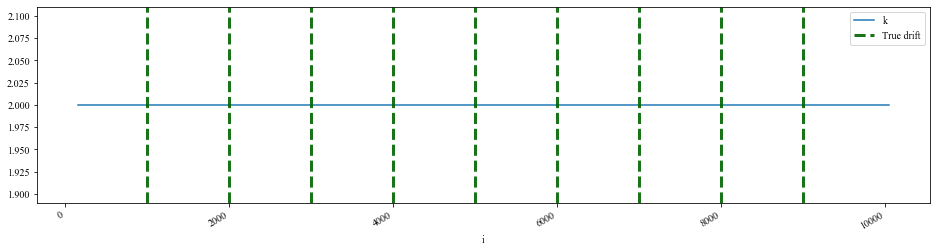

y_pred
centroids
n_variants


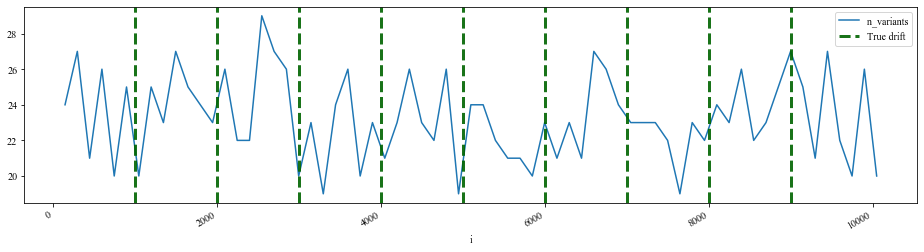

n_representation_distinct


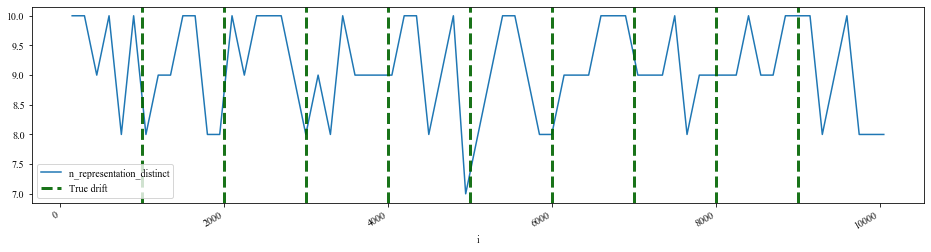

n_outliers


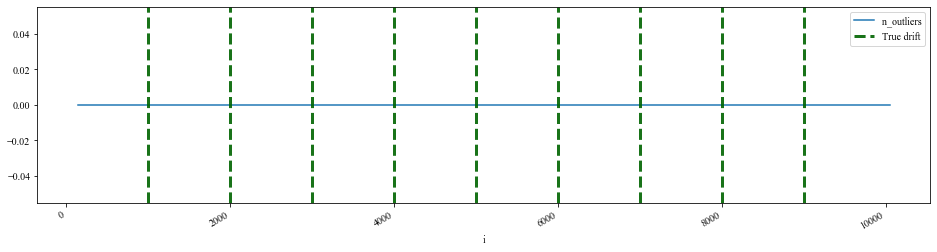

volume_list
Silhouette


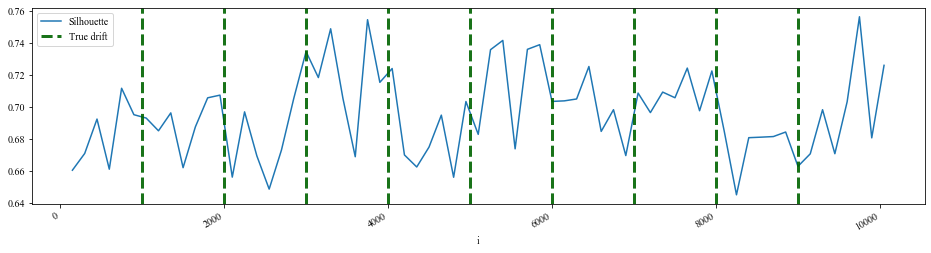

DBi


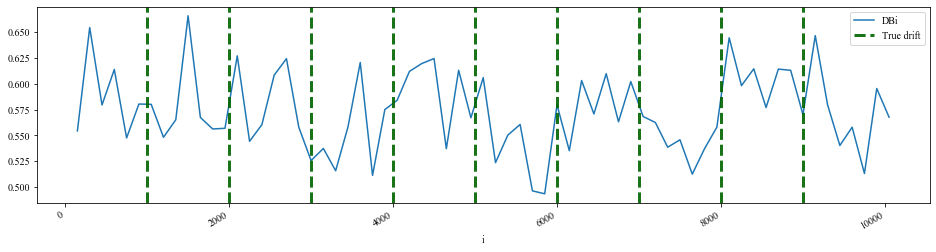

calinski_harabasz_score


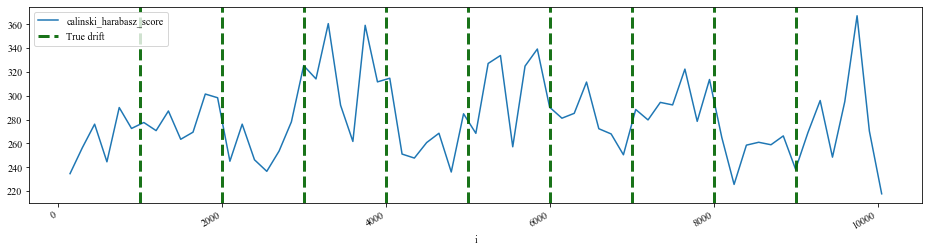

validity_index


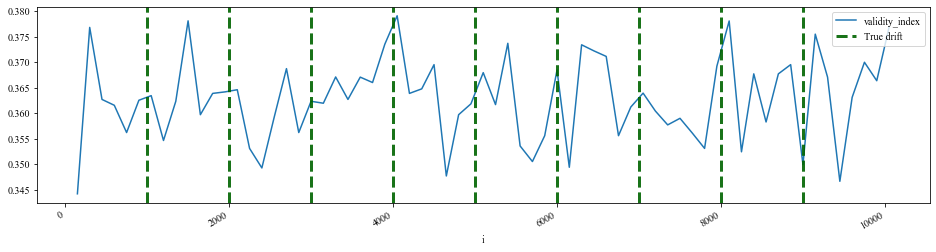

validity_index_mean


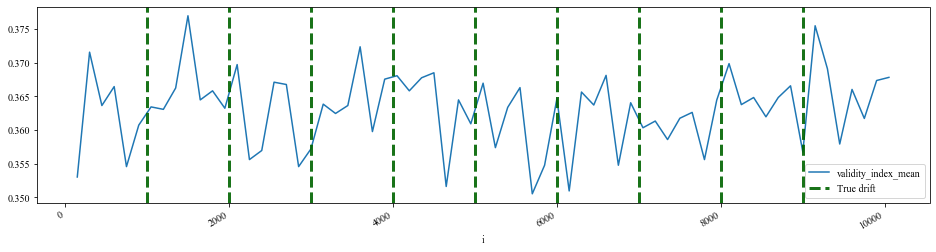

validity_index_std


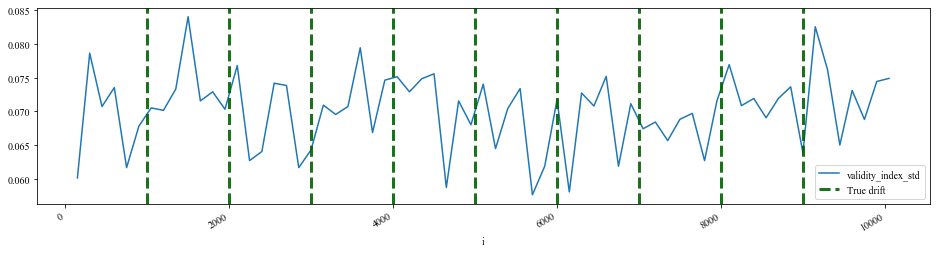

validity_index_per_cluster_list
inter_dist_euclidean_mean


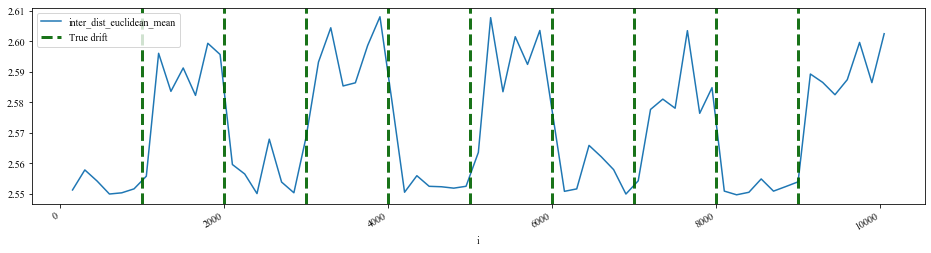

inter_dist_euclidean_std


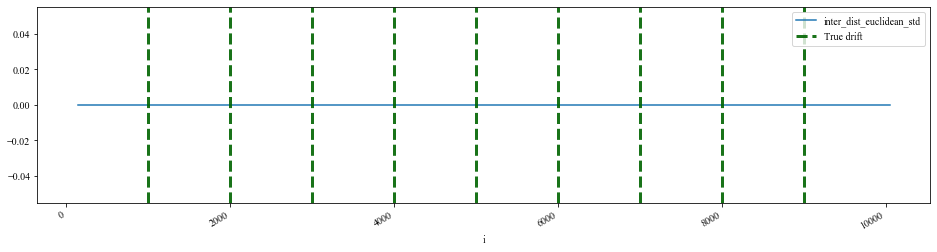

inter_dist_euclidean_max


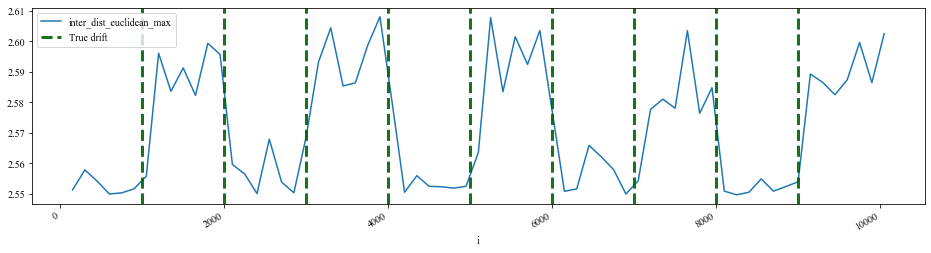

inter_dist_euclidean_min


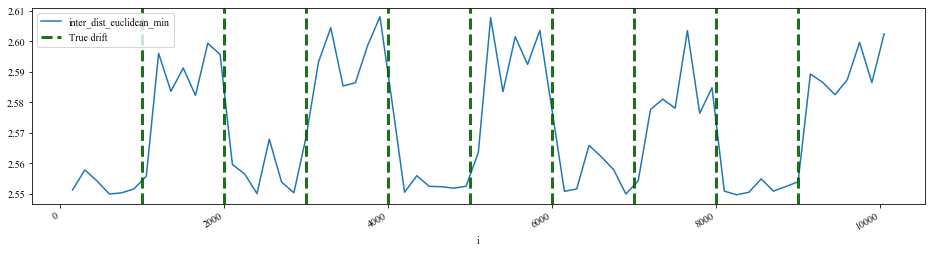

inter_dist_euclidean_max_avg


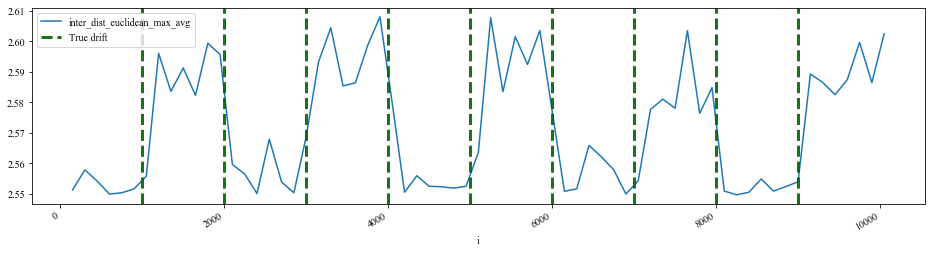

inter_dist_euclidean_min_avg


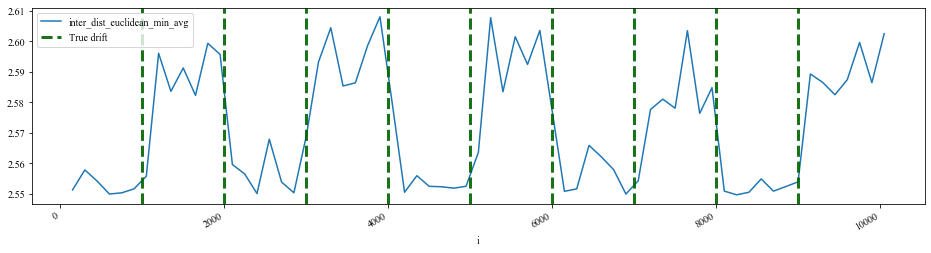

inter_dist_hamming_mean


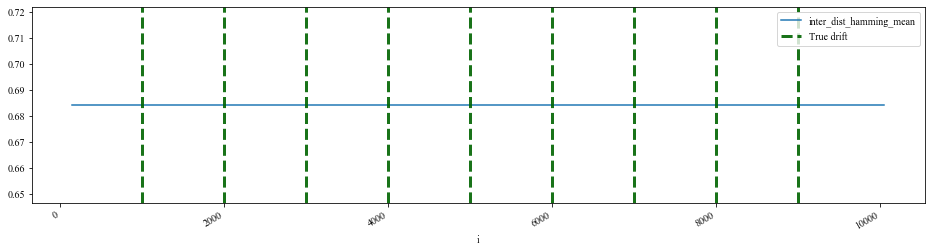

inter_dist_hamming_std


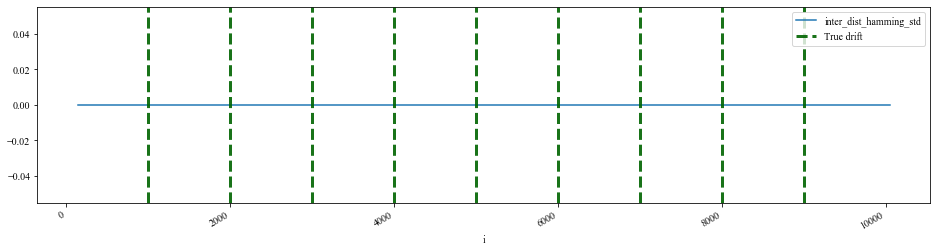

inter_dist_hamming_max


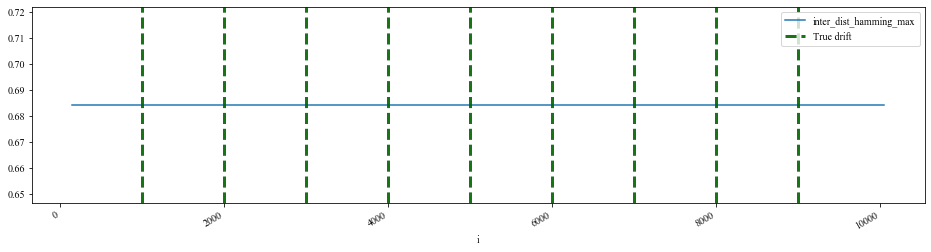

inter_dist_hamming_min


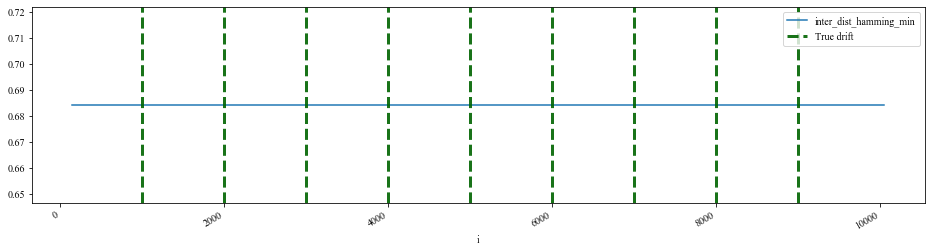

inter_dist_hamming_max_avg


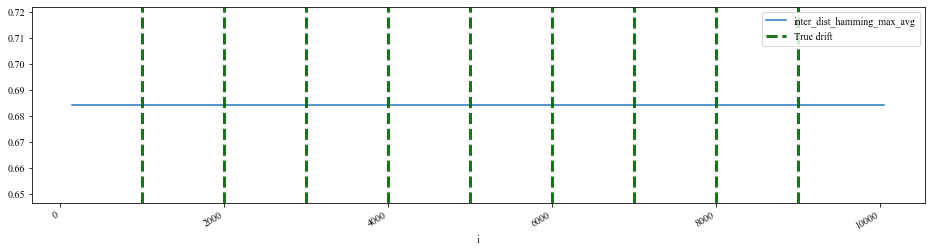

inter_dist_hamming_min_avg


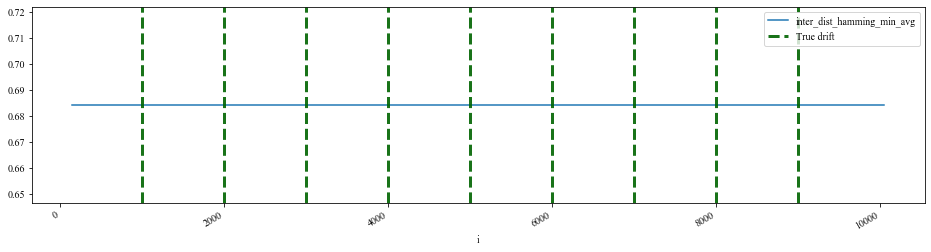

inter_dist_cityblock_mean


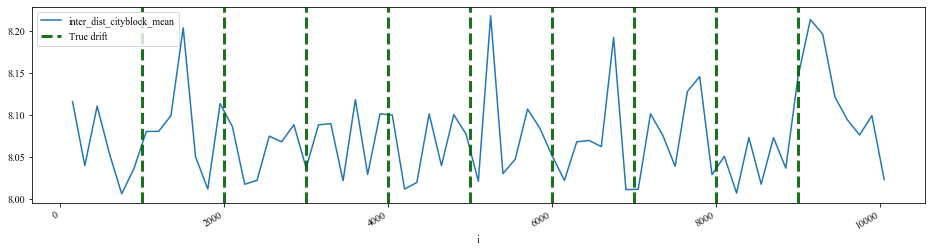

inter_dist_cityblock_std


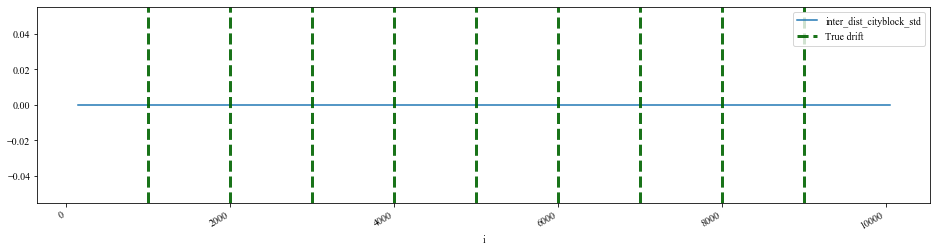

inter_dist_cityblock_max


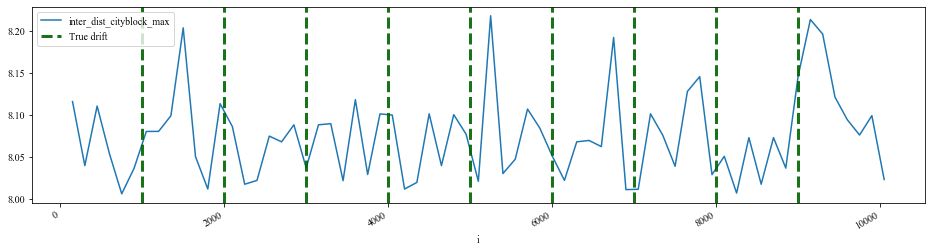

inter_dist_cityblock_min


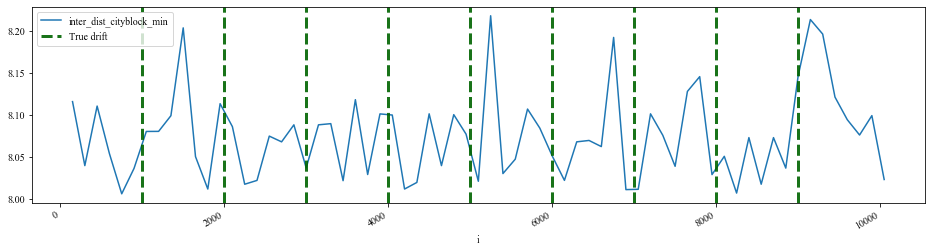

inter_dist_cityblock_max_avg


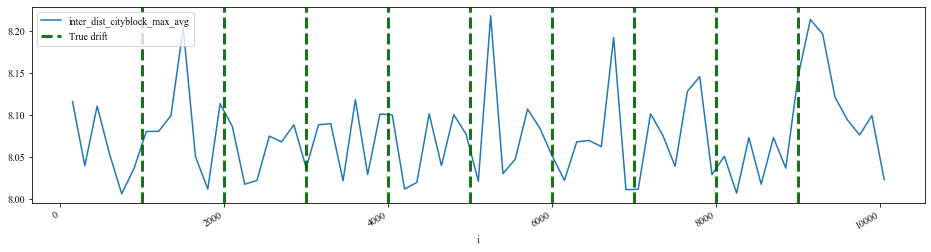

inter_dist_cityblock_min_avg


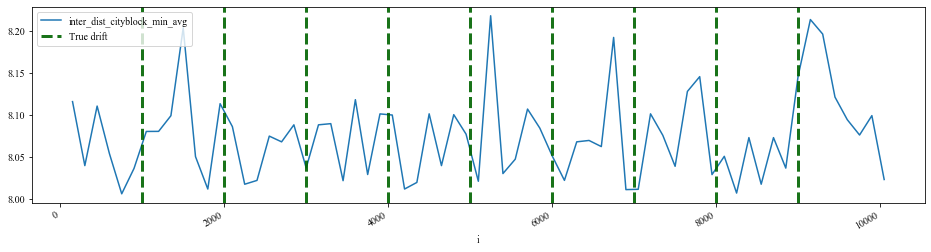

inter_dist_jaccard_mean


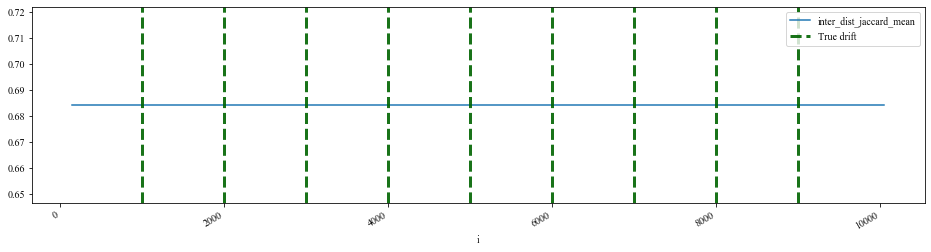

inter_dist_jaccard_std


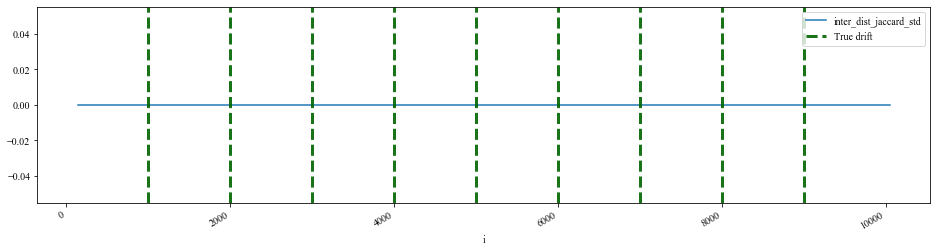

inter_dist_jaccard_max


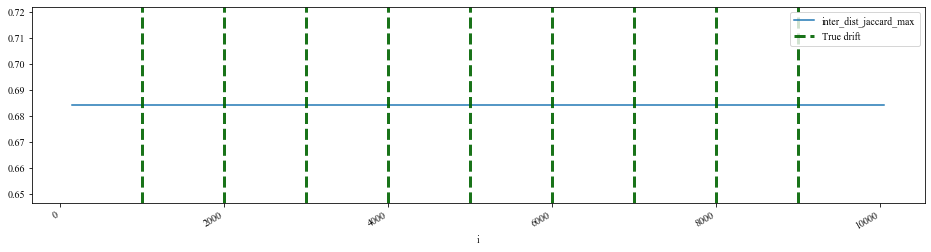

inter_dist_jaccard_min


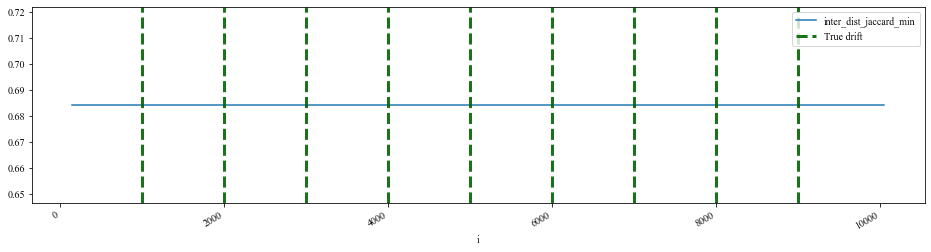

inter_dist_jaccard_max_avg


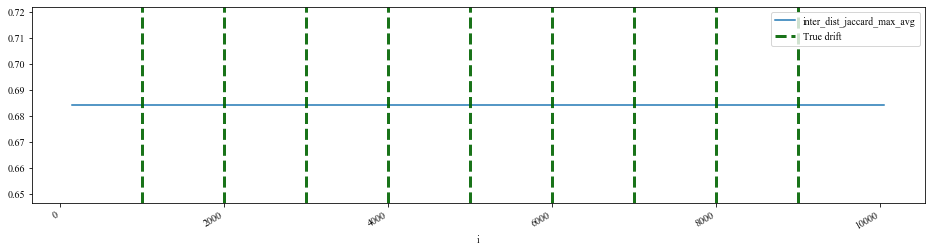

inter_dist_jaccard_min_avg


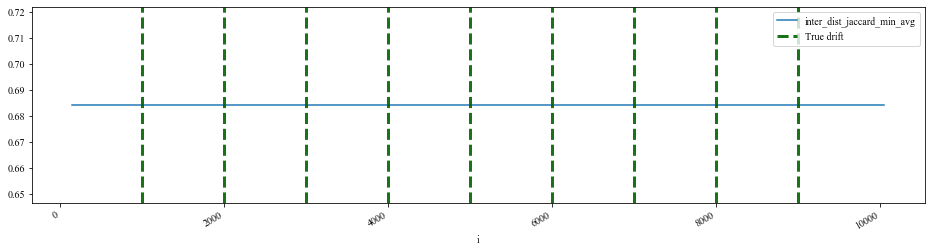

inter_dist_cosine_mean


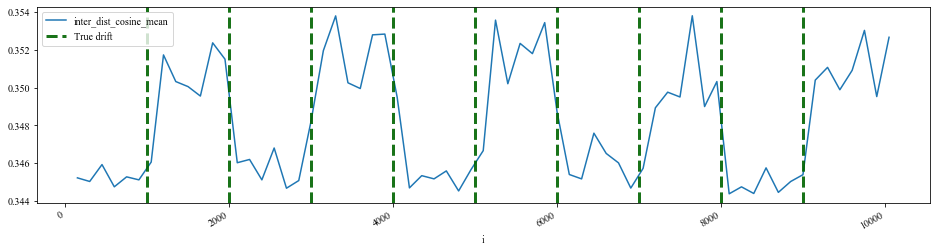

inter_dist_cosine_std


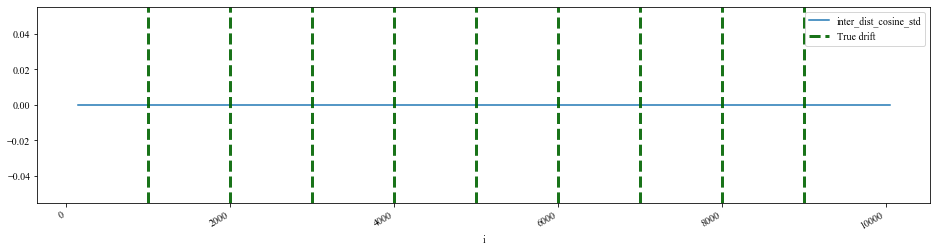

inter_dist_cosine_max


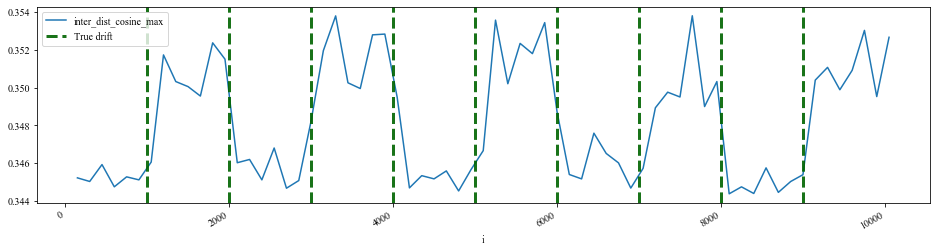

inter_dist_cosine_min


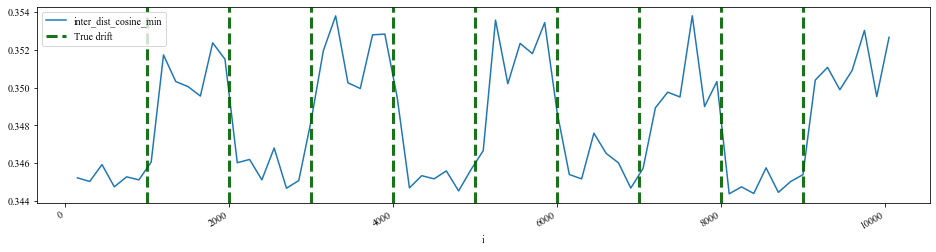

inter_dist_cosine_max_avg


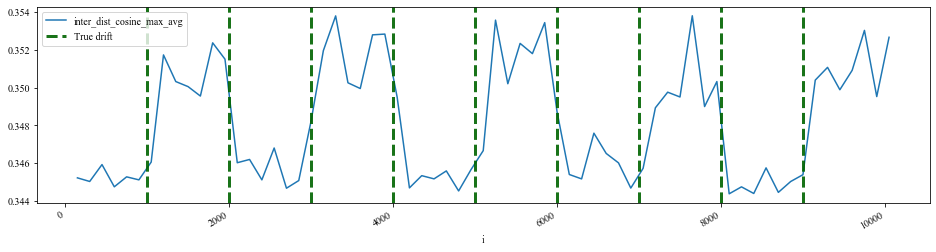

inter_dist_cosine_min_avg


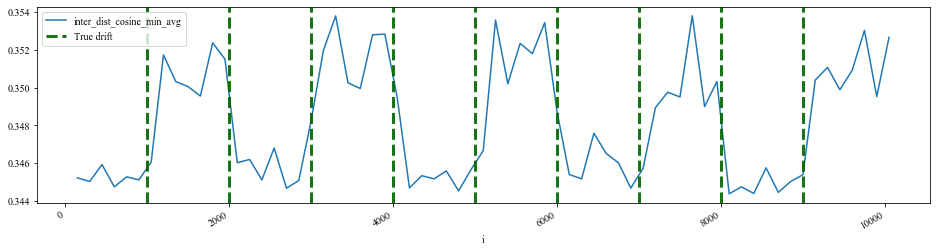

radius_list
dist_intra_cluster_list
skewness_list
cluster_std_list
radius_list_mean


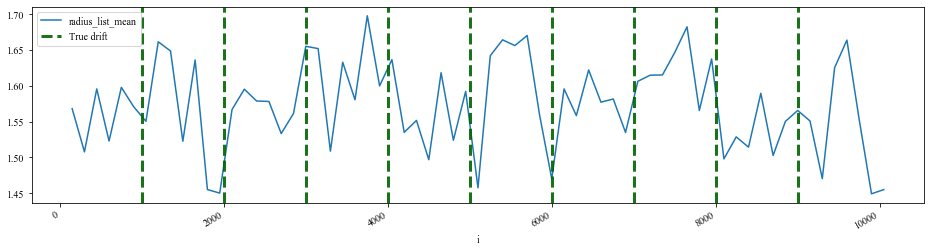

radius_list_std


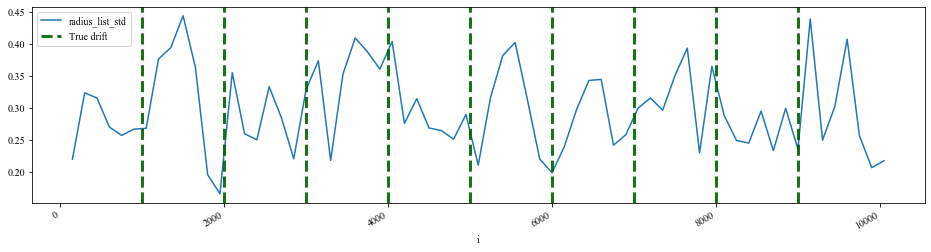

radius_list_sum


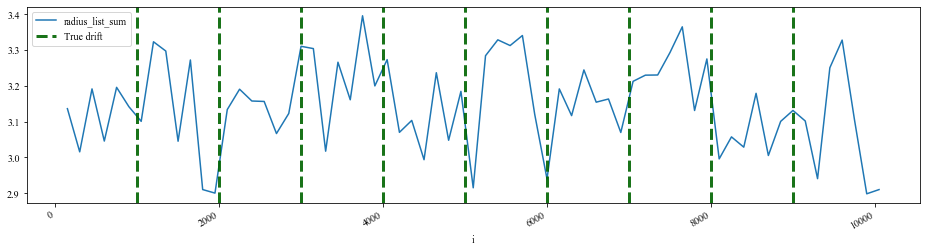

dist_intra_cluster_list_mean


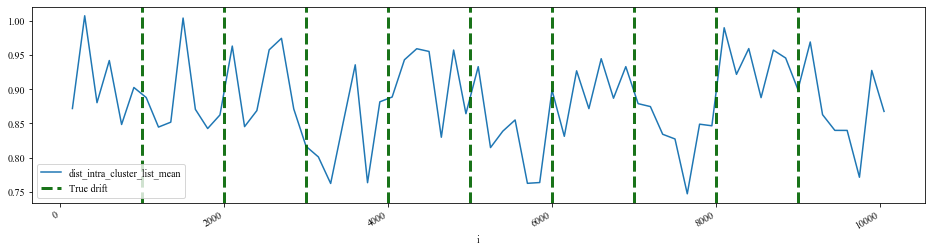

dist_intra_cluster_list_std


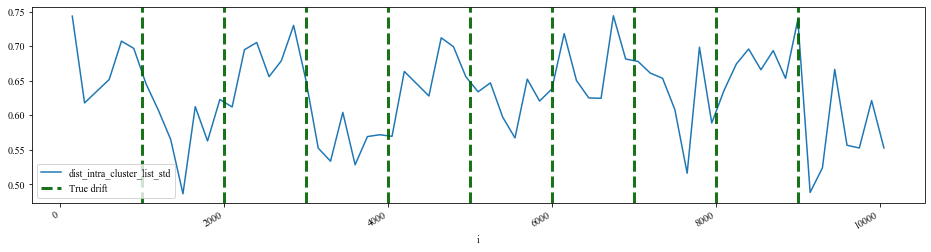

dist_intra_cluster_list_sum


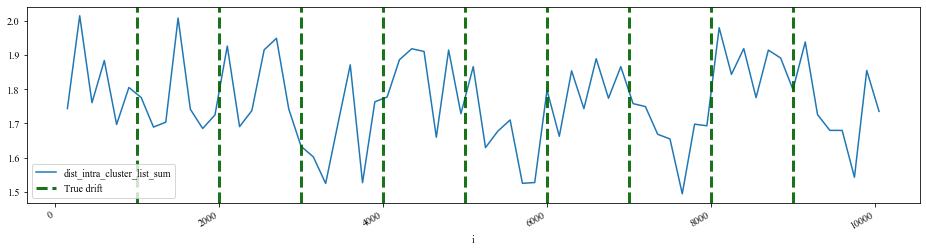

skewness_list_mean


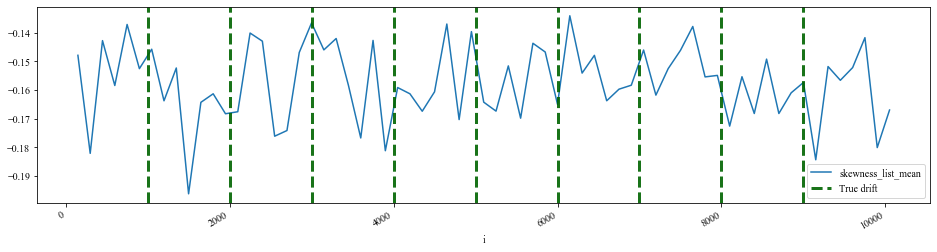

skewness_list_std


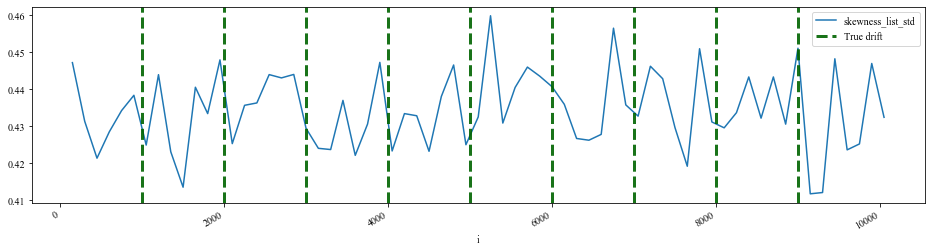

skewness_list_sum


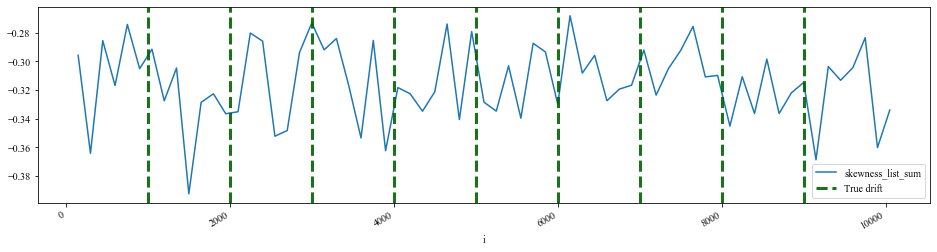

cluster_std_list_mean


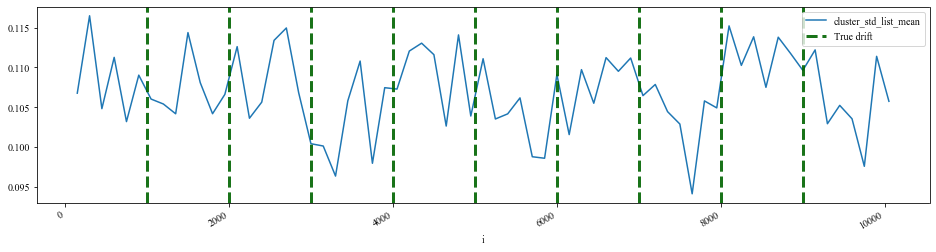

cluster_std_list_std


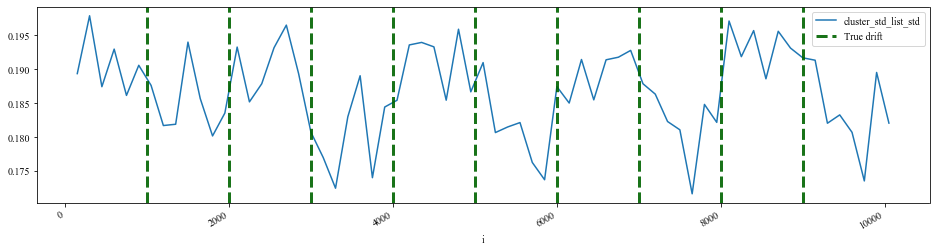

cluster_std_list_sum


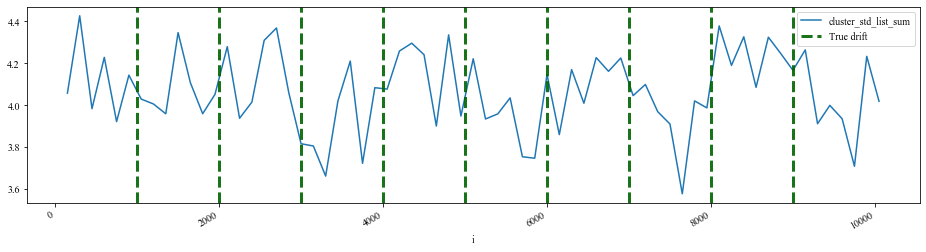

diff_k


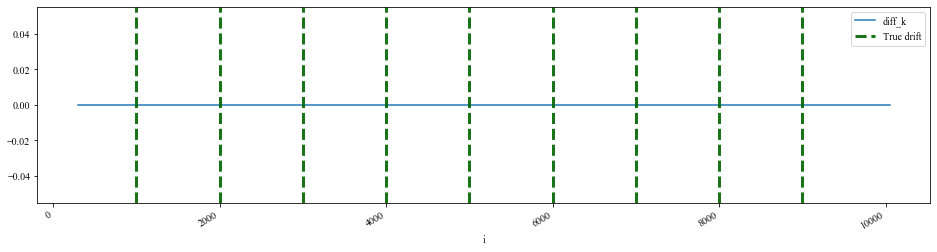

mean_diff_centroids


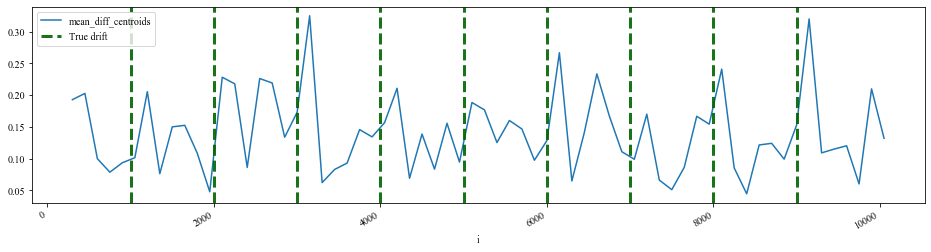

std_diff_centroids


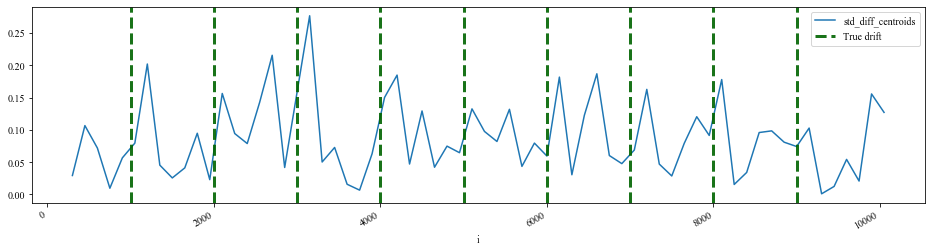

total_MSE


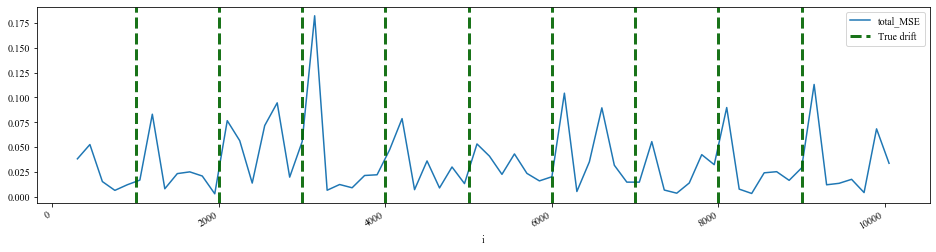

avg_MSE


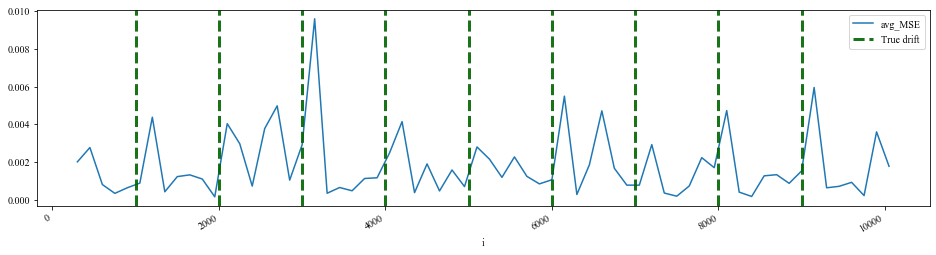

count_non_zero_MSE


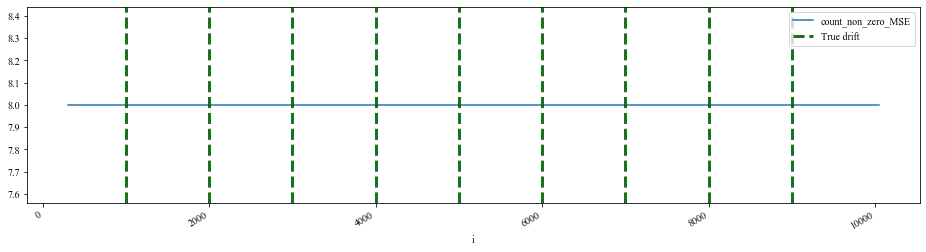

diff_n_variants


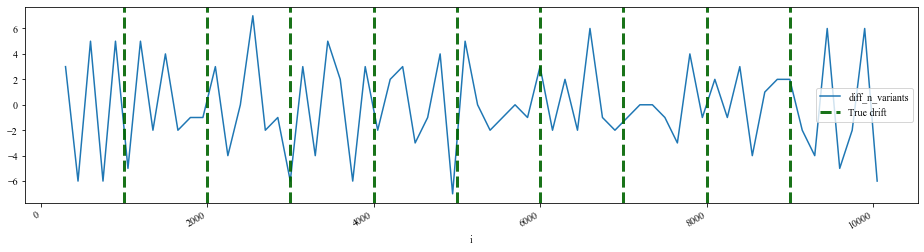

diff_n_representation_distinct


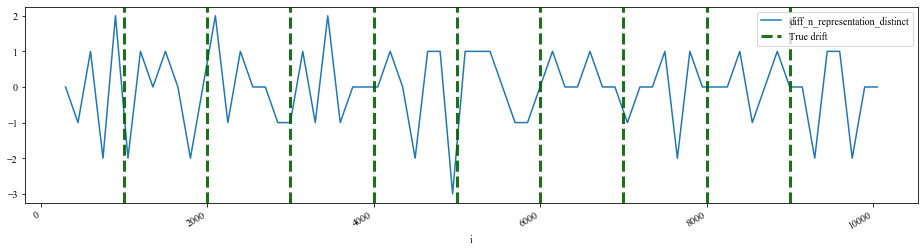

diff_n_outliers


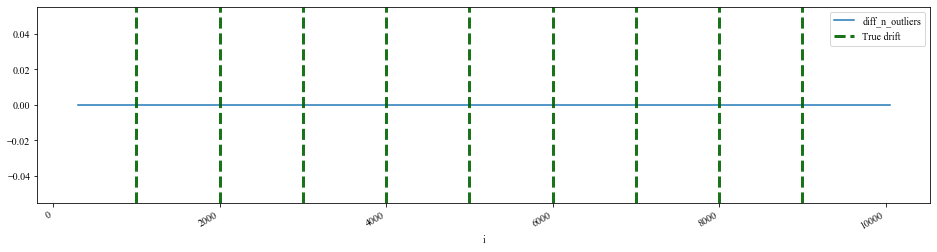

mean_diff_volume


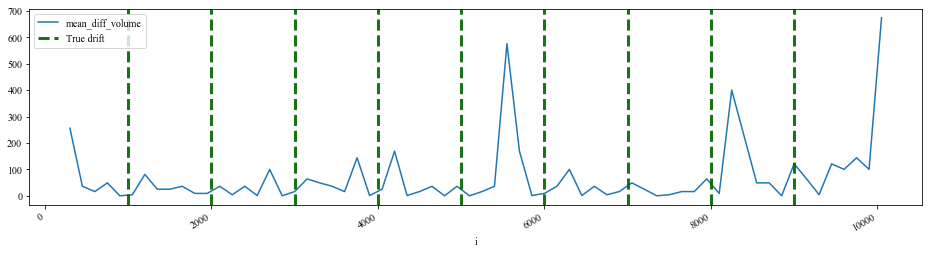

std_diff_volume


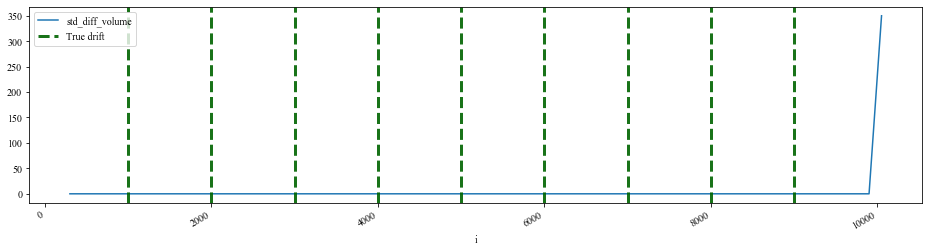

diff_Silhouette


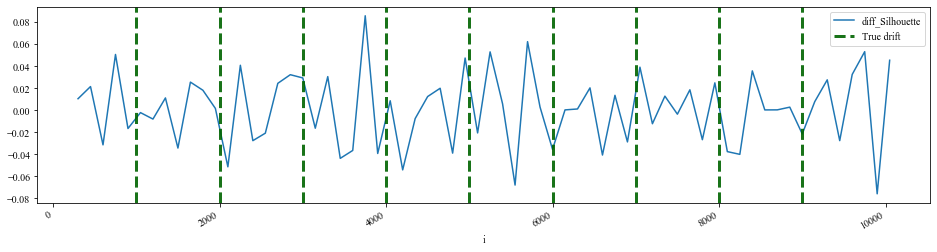

diff_DBi


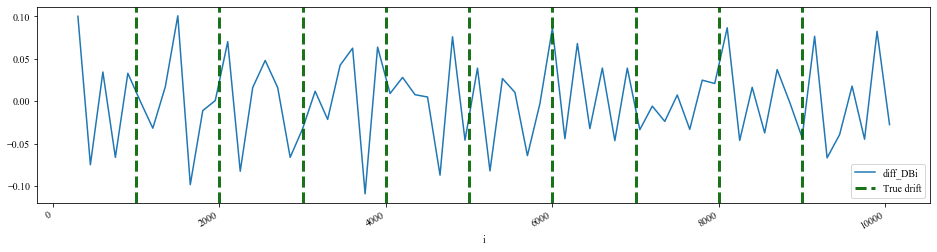

diff_calinski_harabasz_score


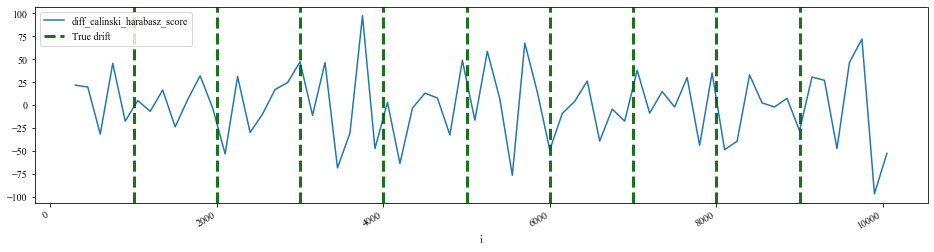

diff_validity_index


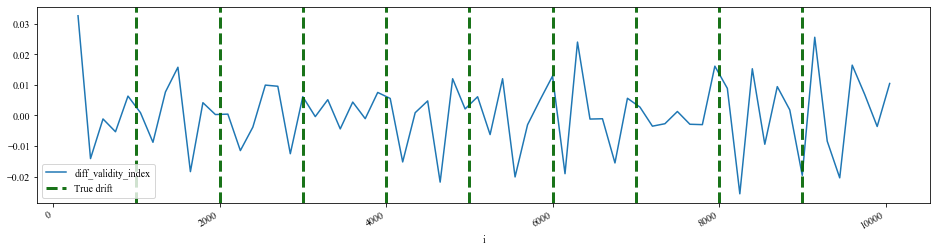

diff_validity_index_mean


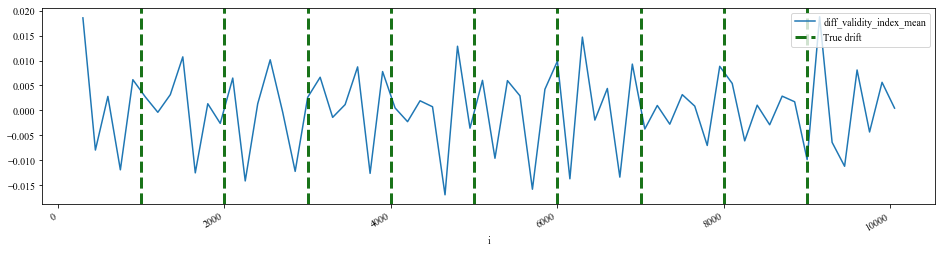

diff_validity_index_std


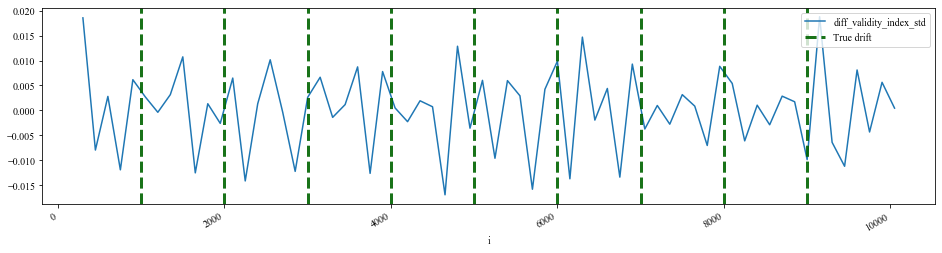

mean_diff_validity_index_per_cluster


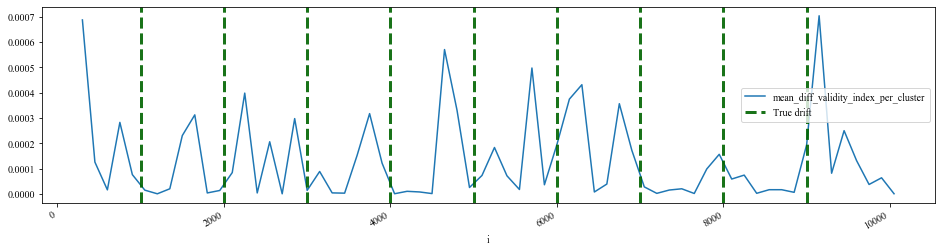

std_diff_validity_index_per_cluster


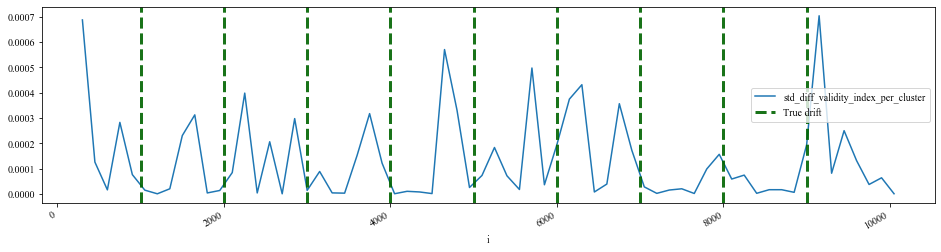

diff_inter_dist_euclidean_mean


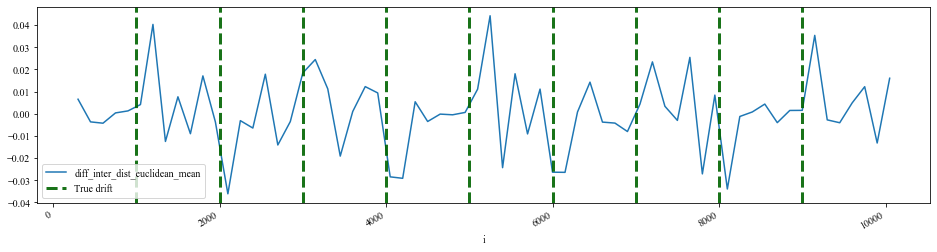

diff_inter_dist_euclidean_std


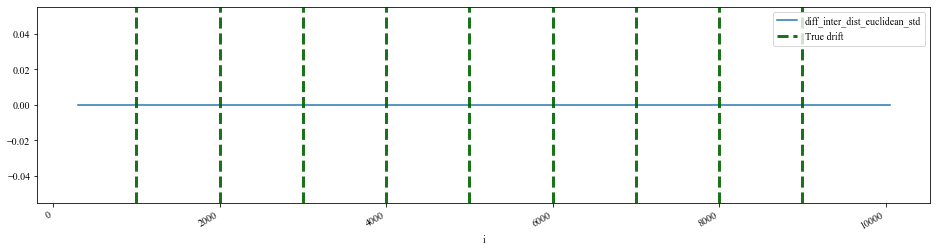

diff_inter_dist_euclidean_max


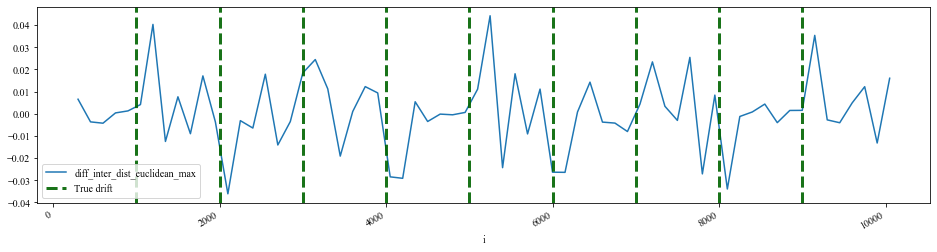

diff_inter_dist_euclidean_min


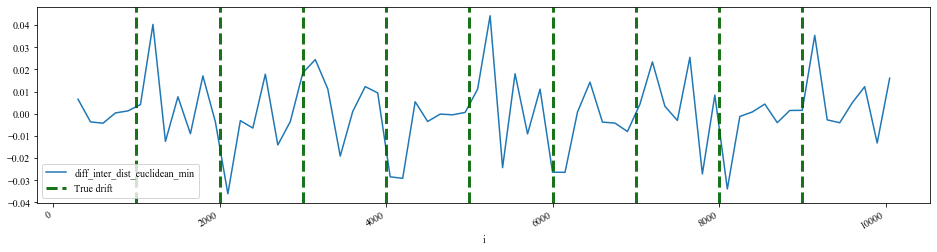

diff_inter_dist_euclidean_max_avg


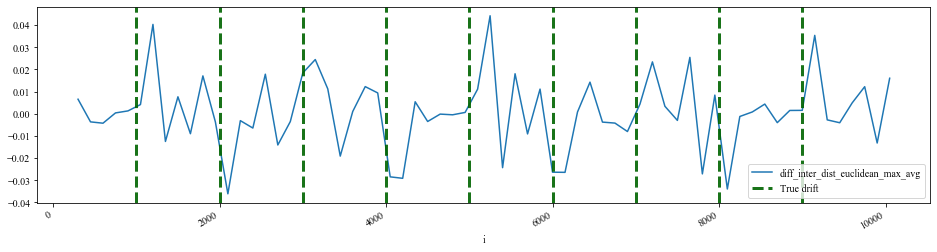

diff_inter_dist_euclidean_min_avg


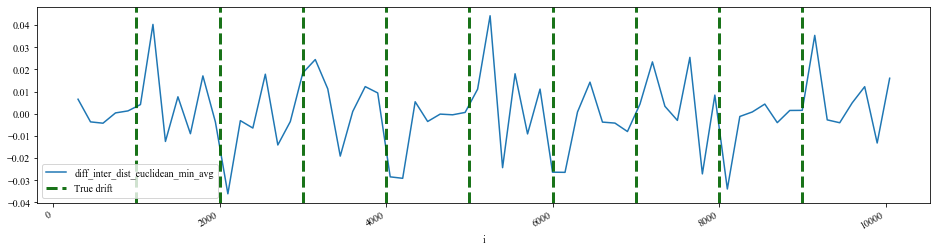

diff_inter_dist_hamming_mean


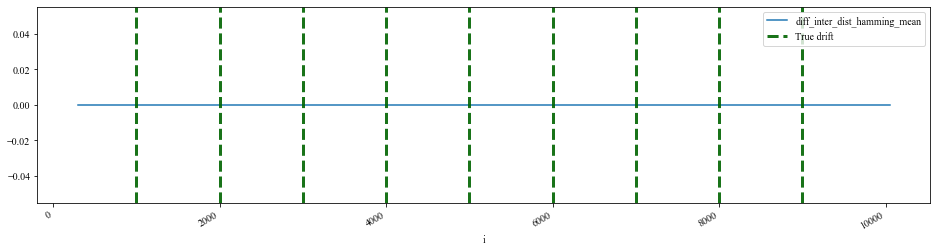

diff_inter_dist_hamming_std


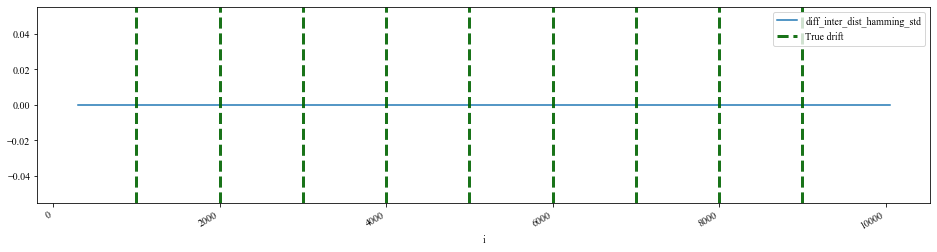

diff_inter_dist_hamming_max


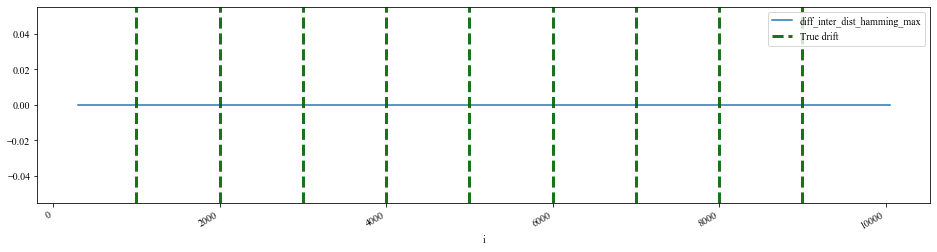

diff_inter_dist_hamming_min


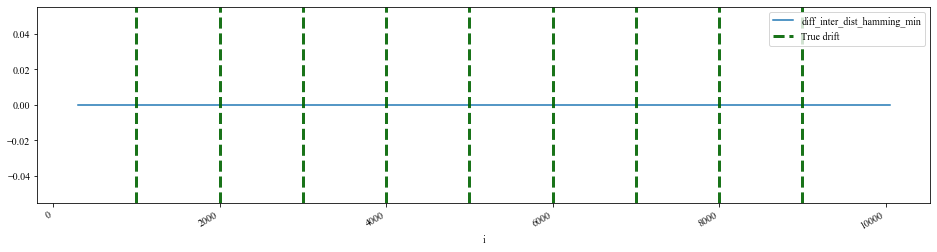

diff_inter_dist_hamming_max_avg


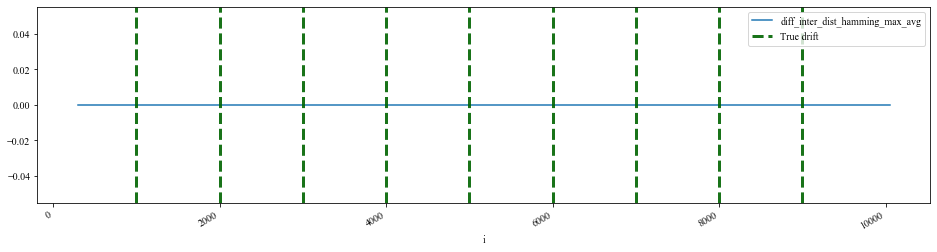

diff_inter_dist_hamming_min_avg


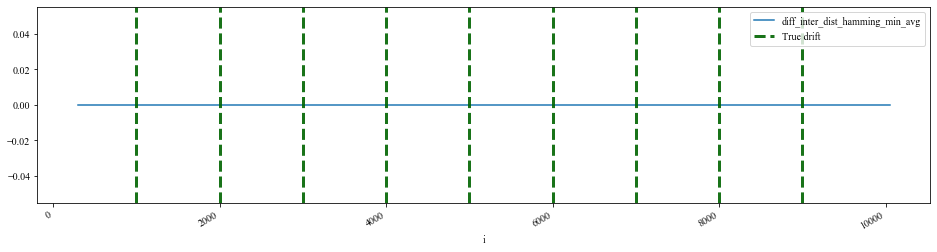

diff_inter_dist_cityblock_mean


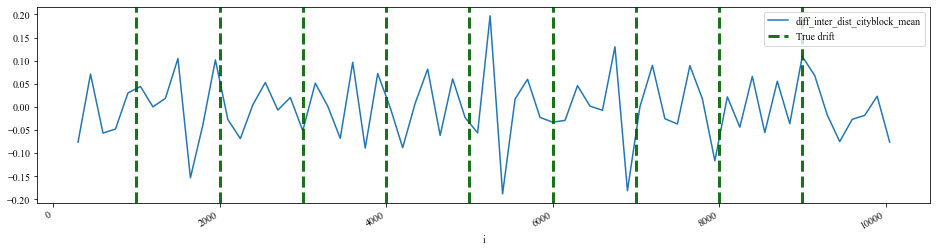

diff_inter_dist_cityblock_std


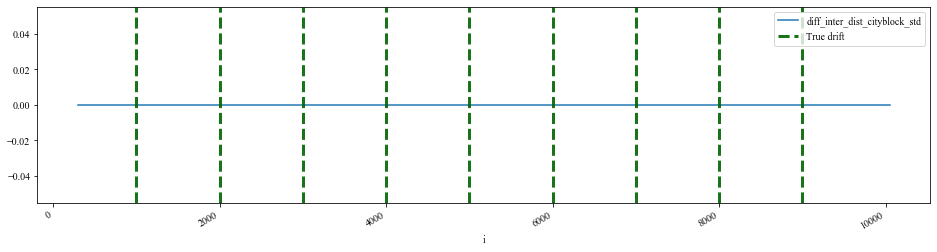

diff_inter_dist_cityblock_max


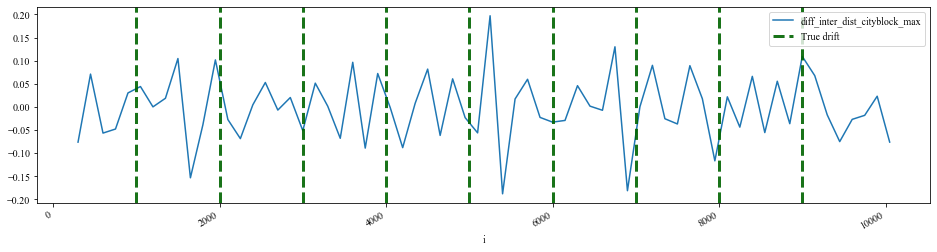

diff_inter_dist_cityblock_min


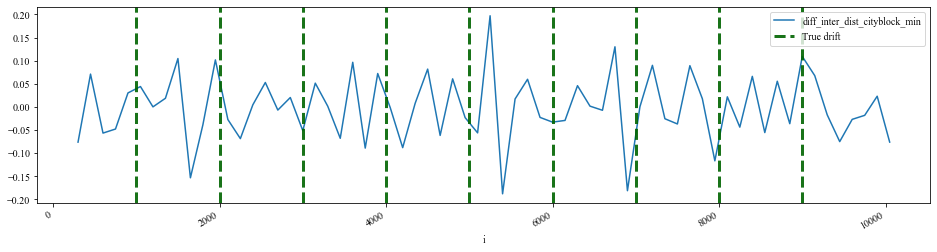

diff_inter_dist_cityblock_max_avg


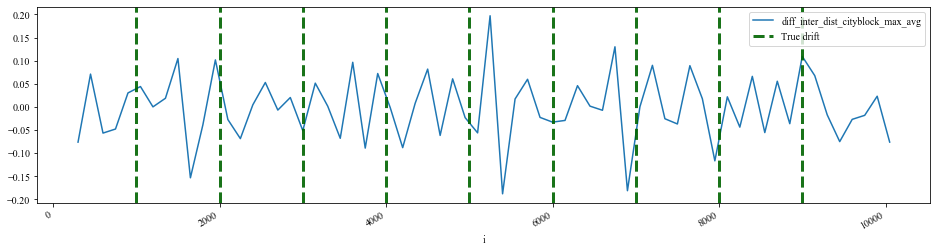

diff_inter_dist_cityblock_min_avg


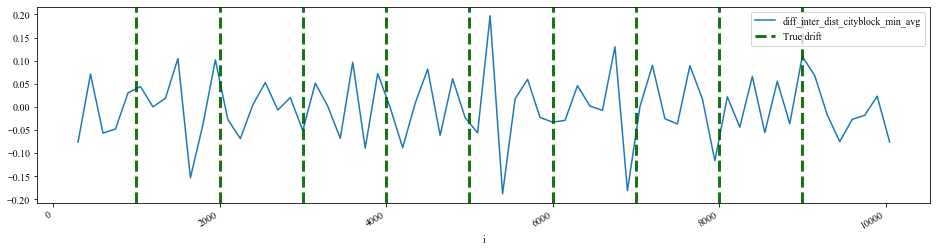

diff_inter_dist_jaccard_mean


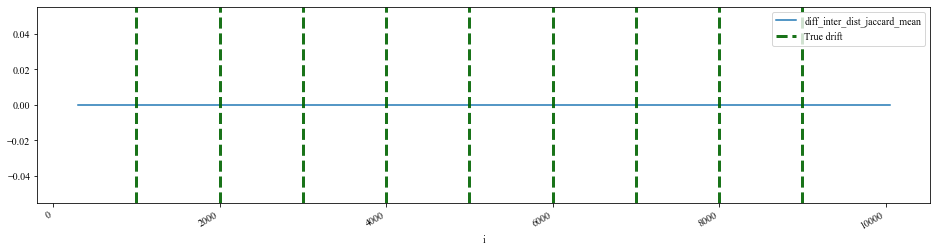

diff_inter_dist_jaccard_std


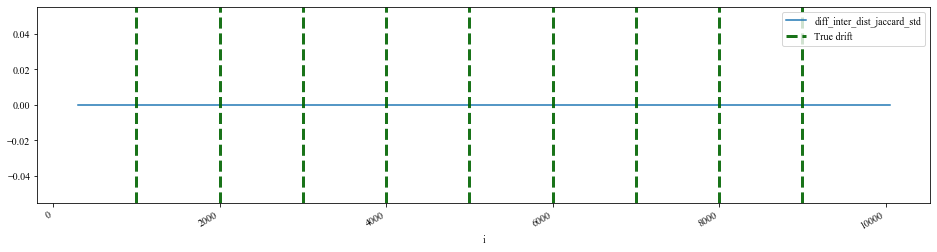

diff_inter_dist_jaccard_max


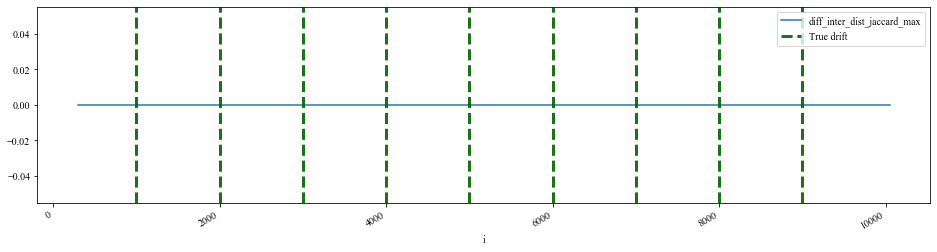

diff_inter_dist_jaccard_min


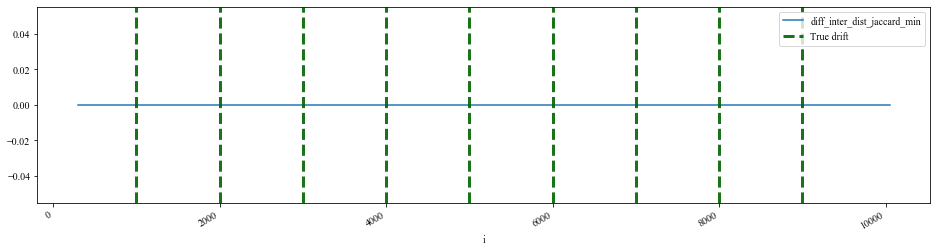

diff_inter_dist_jaccard_max_avg


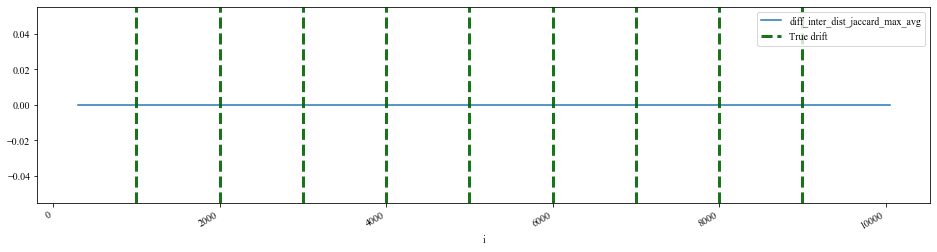

diff_inter_dist_jaccard_min_avg


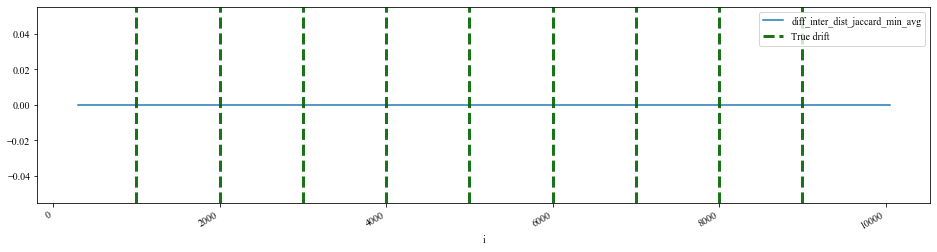

diff_inter_dist_cosine_mean


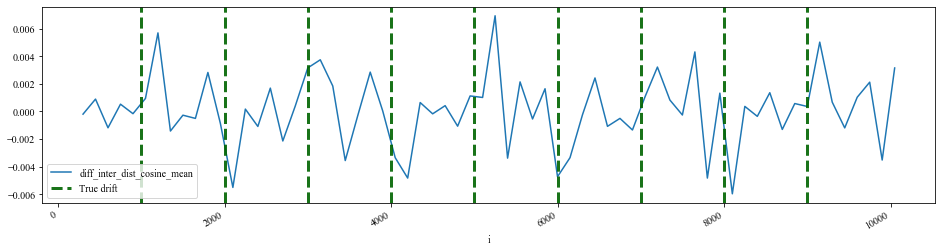

diff_inter_dist_cosine_std


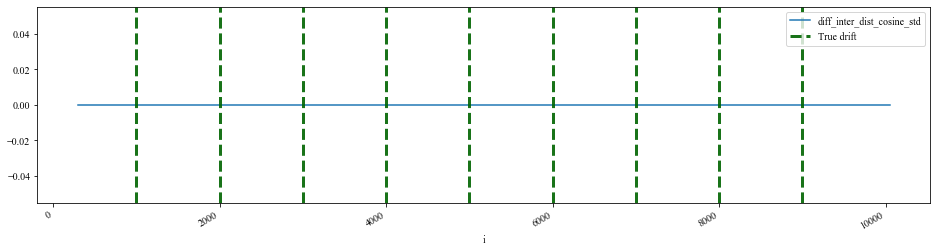

diff_inter_dist_cosine_max


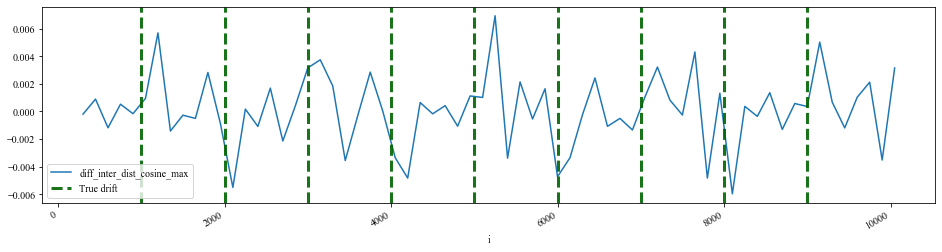

diff_inter_dist_cosine_min


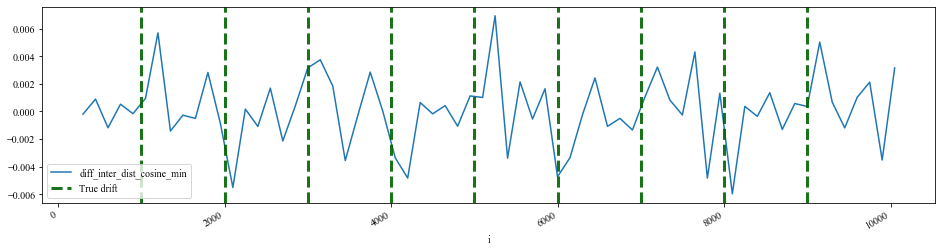

diff_inter_dist_cosine_max_avg


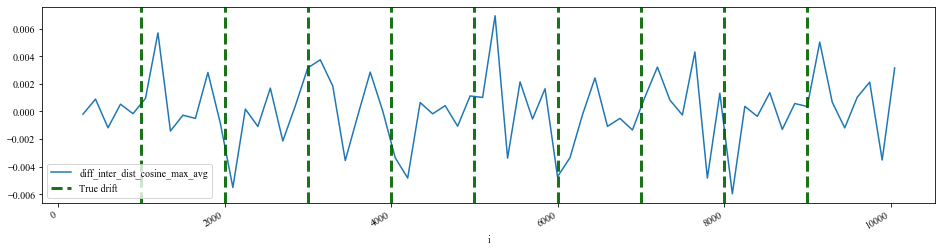

diff_inter_dist_cosine_min_avg


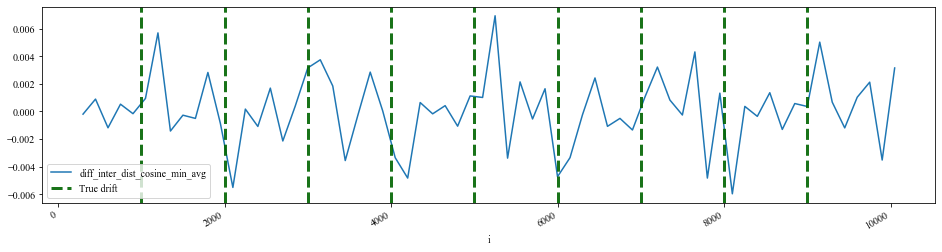

mean_diff_radius


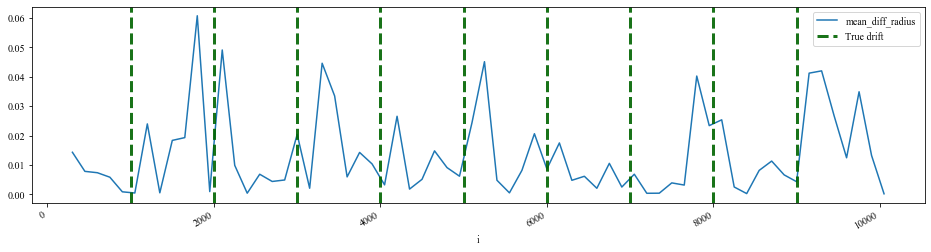

std_diff_radius


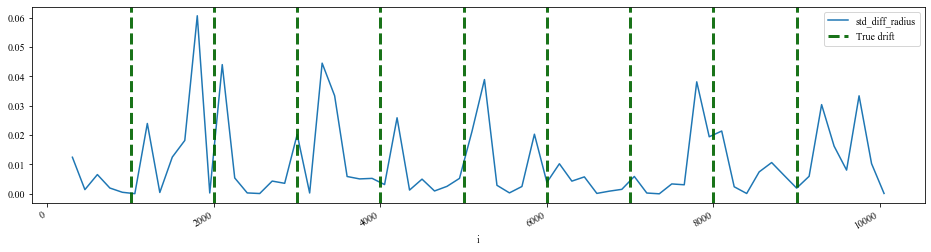

mean_diff_dist_intra_cluster


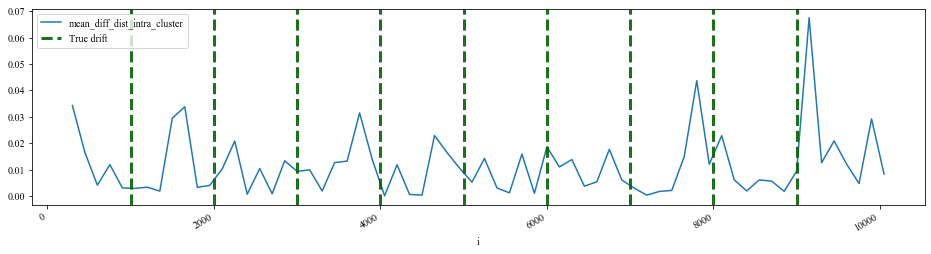

std_diff_dist_intra_cluster


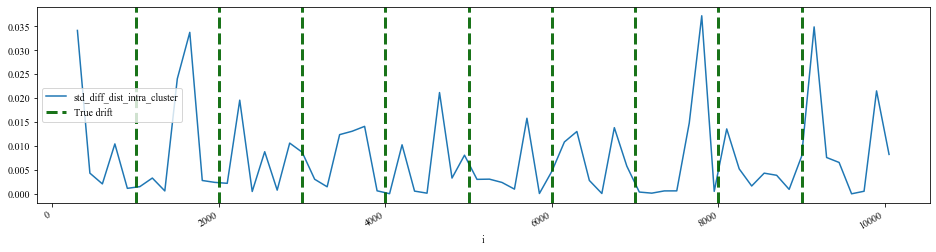

mean_diff_skewness


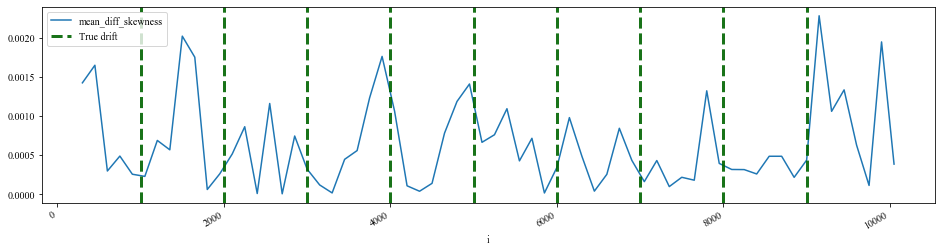

std_diff_skewness


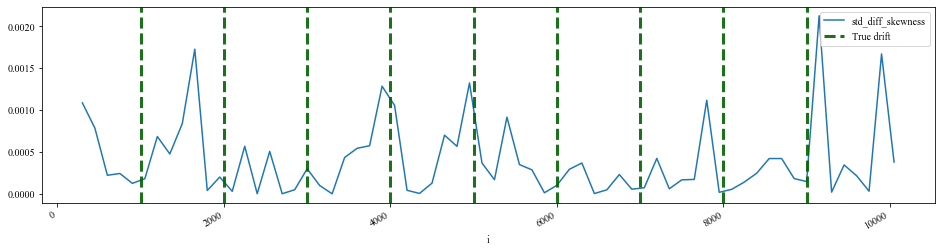

mean_diff_cluster_std


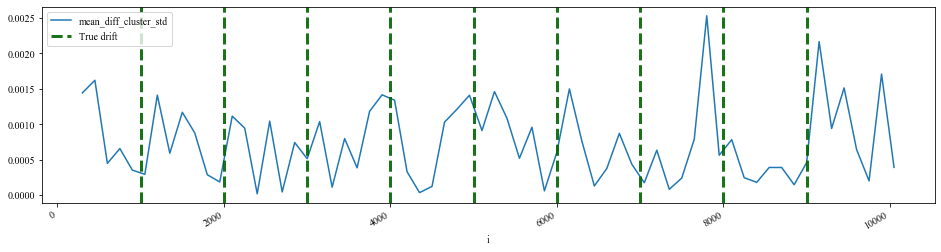

std_diff_cluster_std


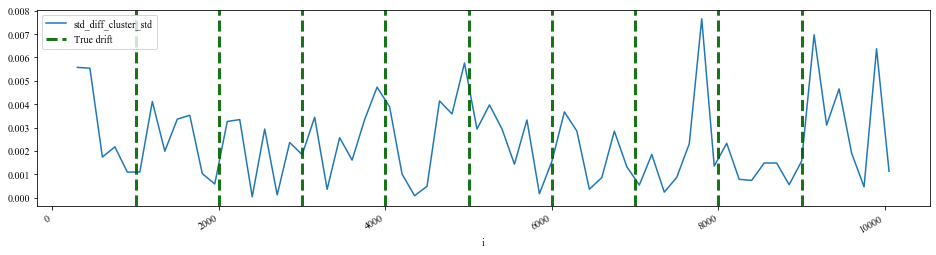

diff_radius_mean


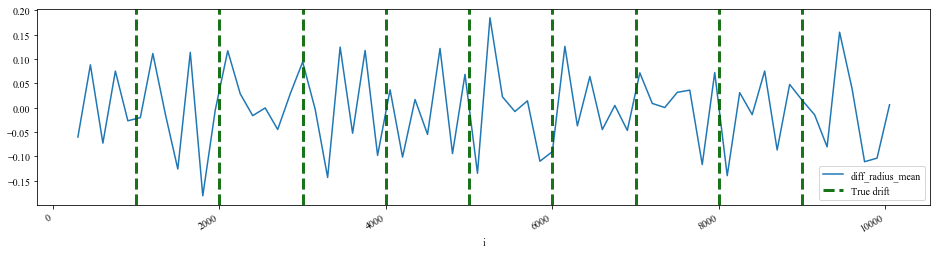

diff_radius_std


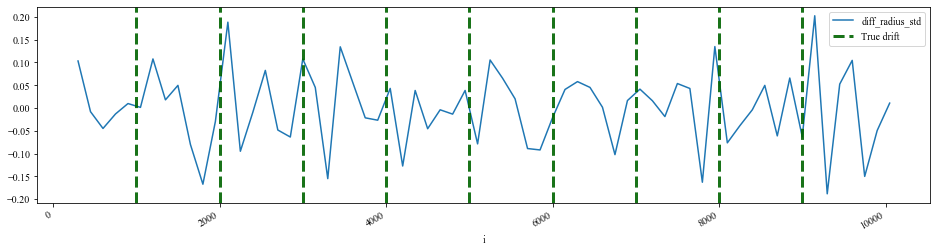

diff_radius_sum


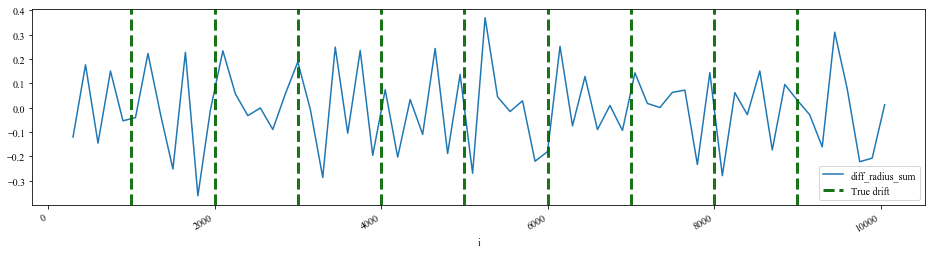

diff_dist_intra_cluster_mean


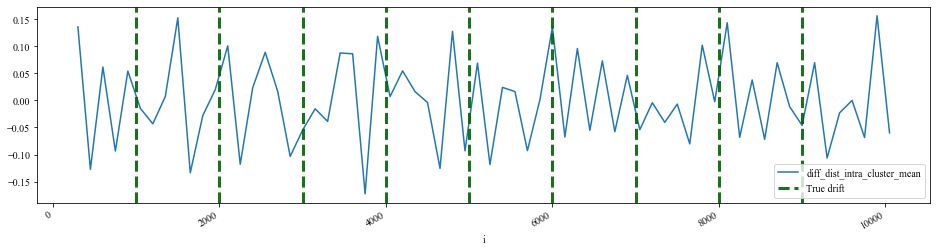

diff_dist_intra_cluster_std


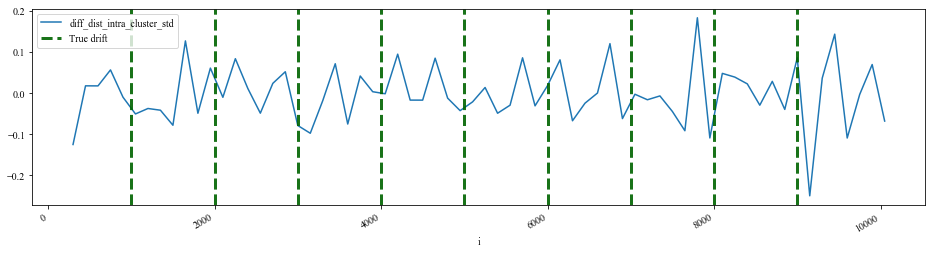

diff_dist_intra_cluster_sum


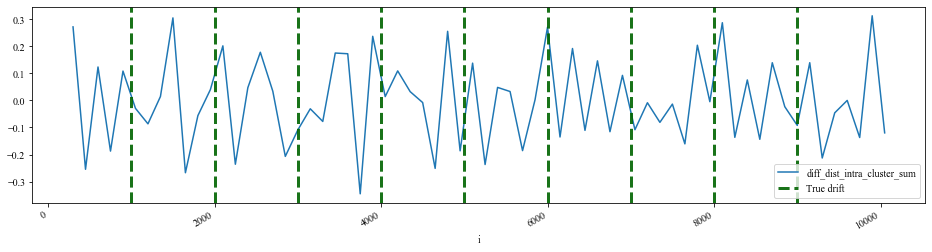

diff_skewness_mean


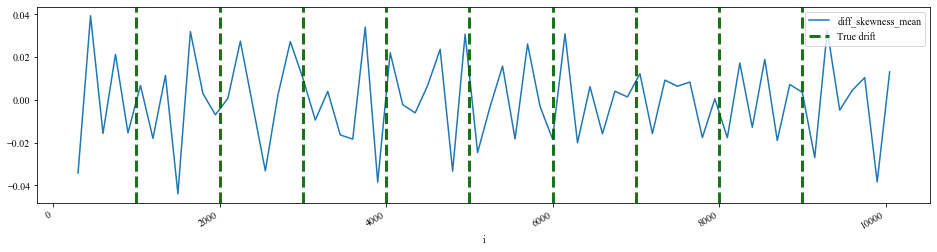

diff_skewness_std


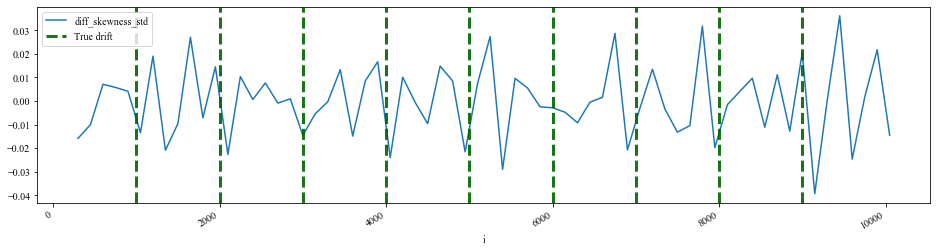

diff_skewness_sum


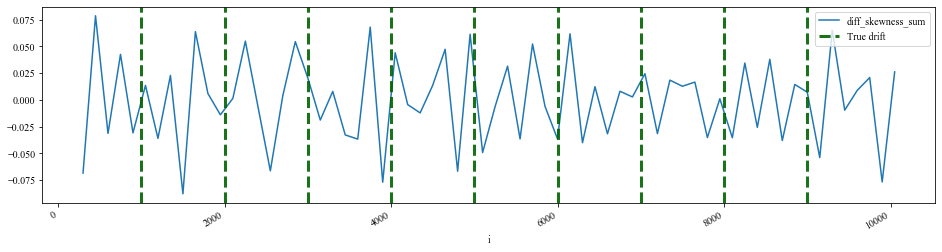

diff_cluster_std_mean


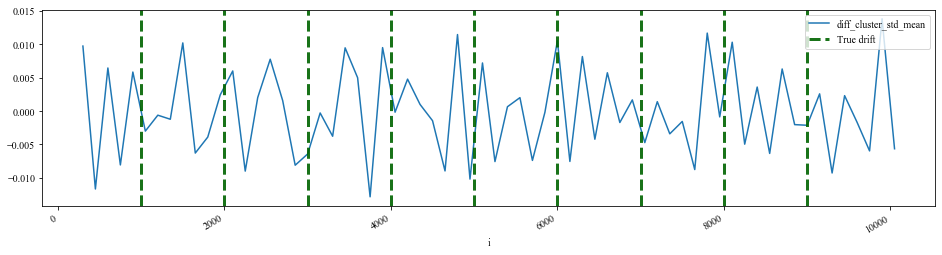

diff_cluster_std_std


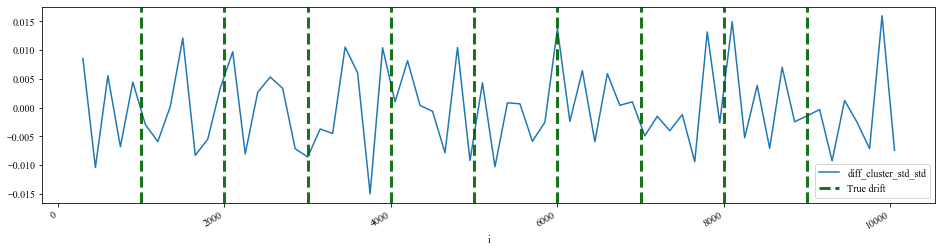

diff_cluster_std_sum


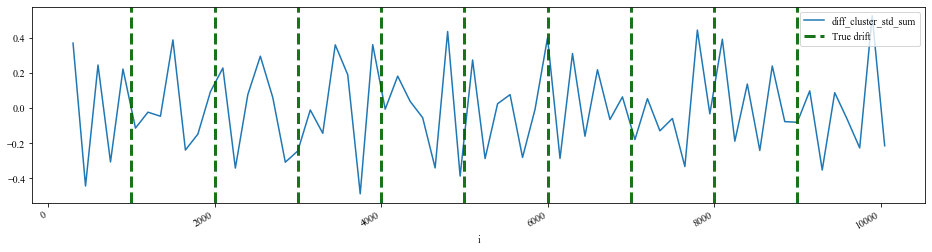

In [126]:
for i in run_df.columns:
    print(i)
    try:
        run_df[i].plot(figsize=(16,4),subplots=True)
        plts.plot_drift_vertical_lines(len(tokens), label="True drift")
        plt.legend()
        plt.show()
    except:
        pass

In [127]:
# from sklearn.manifold import TSNE
# df_subset = X.iloc[0:clustering_window_size]
# tsne = TSNE(n_components=2, perplexity=20, n_iter=1000)
# tsne_results = tsne.fit_transform(df_subset)

# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one"
#     , y="tsne-2d-two"
# #     ,hue="y"
#     ,palette=sns.color_palette("hls", 10)
#     ,data=df_subset
#     ,legend="full"
#     ,alpha=0.3
# )

### Drift Detection

In [128]:
# metric = "inter_dist_euclidean_mean"

# drifts, not_drifts, info = dd.detect_concept_drift(
#     run_df,
#     metric,
#     rolling_window=4,
#     std_tolerance=2,
#     min_tol=0.0025,
#     verbose=False
# )

In [129]:
metric = "inter_dist_euclidean_mean"

drifts1, not_drifts1, info1 = dd.detect_concept_drift(
    run_df,
    metric,
    rolling_window=4,
    std_tolerance=2,
    min_tol=0.0025,
    verbose=False
)

In [130]:
metric = "Silhouette"

drifts2, not_drifts2, info2 = dd.detect_concept_drift(
    run_df,
    metric,
    rolling_window=4,
    std_tolerance=2,
    min_tol=0.0025,
    verbose=False
)

In [131]:
metric = "count_non_zero_MSE"

drifts3, not_drifts3, info3 = dd.detect_concept_drift(
    run_df,
    metric,
    rolling_window=4,
    std_tolerance=2,
    min_tol=0.0025,
    verbose=False
)

In [132]:
print(drifts1)
print(drifts2)
print(drifts3)

[1200, 2100, 3150, 4200, 5100, 6000, 7200, 8100, 9150, 10050]
[1500, 3000, 4950, 6600, 7650, 9000, 9750]
[]


In [110]:
margin_error = 2
log_size = len(tokens)

# start_time = time.time()
dd.get_metrics(
    drifts
    ,not_drifts
    , y_true
    , clustering_window_size
    , log_size
    , margin_error
)
# print("--- %s seconds ---" % (time.time() - start_time))

{'Precision': 0.6666666666666666,
 'Recall': 0.6666666666666666,
 'F1': 0.6666666666666666,
 'Specificity': 0.8125,
 'Precision_negative': 0.8125,
 'Delay': 0.888888888888889,
 'Correct_Predictions': [2250, 3150, 4200, 4950, 6000, 8250],
 'Support_correct': 6,
 'tests': 27,
 'Mean_test_per_drift': 3.0,
 'Drifts_Found': [1500, 2250, 3150, 4200, 4950, 6000, 7500, 8250, 9600],
 'Resp': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]}

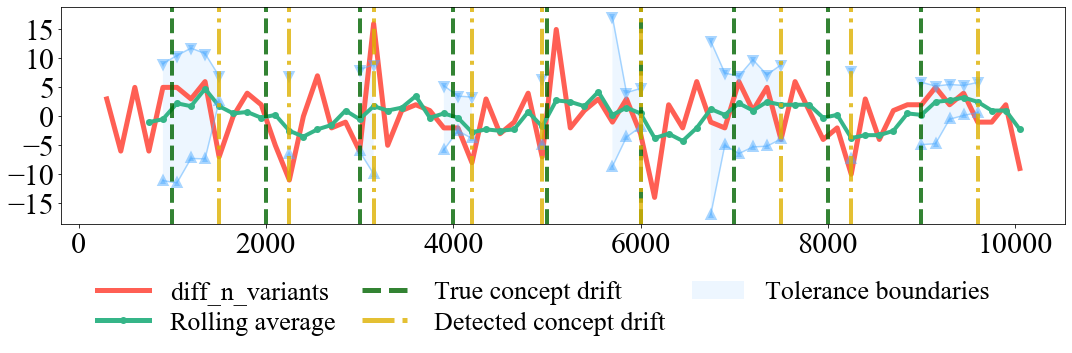

In [95]:
plts.plot_deteccao_drift(
    run_df,
    metric,
    drifts,
    y_true,
    info['means'],
    info['lowers'],
    info['uppers'],
    save_png=""
)

### Drift Localization

In [ ]:
y_true

In [ ]:
run_df

In [ ]:
dl.localize_drift(
    run_df.centroids.loc[450], 
    run_df.centroids.loc[600], 
    X.columns
)

In [ ]:
# Result of drift localization in the ground truth drifts

dl.localize_all_drifts(
    run_df,
    [x + clustering_window_size for x in y_true], 
    clustering_window_size,
    X.columns
)

In [ ]:
# Result of drift localization in all predicted drifts

dl.localize_all_drifts(
    run_df,
    drifts, 
    clustering_window_size,
    activity_binary.columns
)